# Random and Mixed Effects Models

## 1.1 Random Effects Models

### 1.1.1 One-Way ANOVA

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
weight = [61, 100,  56, 113,  99, 103,  75,  62,  ## sire 1
            75, 102,  95, 103,  98, 115,  98,  94,  ## sire 2
            58,  60,  60,  57,  57,  59,  54, 100,  ## sire 3
            57,  56,  67,  59,  58, 121, 101, 101,  ## sire 4
            59,  46, 120, 115, 115,  93, 105,  75 ] ## sire 5
sire=np.array([1,2,3,4,5])
sire=np.repeat(sire,8, axis=0)
animals = {'weight': weight, 'sire': pd.Categorical(sire)}
animals = pd.DataFrame(data=animals)
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   weight  40 non-null     int64   
 1   sire    40 non-null     category
dtypes: category(1), int64(1)
memory usage: 688.0 bytes


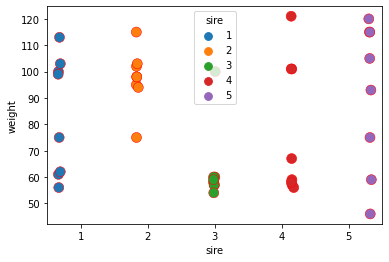

In [3]:
sb.stripplot(x="sire", y="weight" ,data=animals, size=10, edgecolor='red', linewidth=0.5, ax=None, dodge=True, hue="sire")

At first sight it looks like the variation between different sires is rather small

In [4]:
md = smf.mixedlm("weight ~(1-sire)", animals, groups="sire" )
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: weight   
No. Observations: 40      Method:             REML     
No. Groups:       5       Scale:              463.7928 
Min. group size:  8       Log-Likelihood:     -179.1085
Max. group size:  8       Converged:          Yes      
Mean group size:  8.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    82.550    5.911 13.965 0.000 70.964 94.136
sire Var    116.750    6.056                           



alpha_hat = 463.7929
variance sire =116.750
intercept = 82.550

In [5]:
mdf.conf_int(alpha=0.025)

,0,1
Intercept,69.300154,95.799846
sire Var,-0.378549,0.882005


setting the contrast of the data

In [6]:
from patsy.contrasts import Sum
levels = [1,2,3,4,5]
contrast = Sum().code_without_intercept(levels)

In [7]:
aov = ols('weight ~ C(sire, Sum)',data=animals).fit()
table = sm.stats.anova_lm(aov, typ=2) # Type 2 ANOVA DataFrame
print(table)

                sum_sq    df         F    PR(>F)
C(sire, Sum)   5591.15   4.0  3.013819  0.030874
Residual      16232.75  35.0       NaN       NaN


In [8]:
aov.conf_int(alpha=0.05)

,0,1
Intercept,75.637245,89.462755
"C(sire, Sum)[S.1]",-12.750510,14.900510
"C(sire, Sum)[S.2]",1.124490,28.775510
"C(sire, Sum)[S.3]",-33.250510,-5.599490
"C(sire, Sum)[S.4]",-18.875510,8.775510


In [10]:
randomeffect=mdf.random_effects
randomeffect

{1: sire    0.71831
 dtype: float64,
 2: sire    9.989525
 dtype: float64,
 3: sire   -12.9797
 dtype: float64,
 4: sire   -3.374388
 dtype: float64,
 5: sire    5.646253
 dtype: float64}

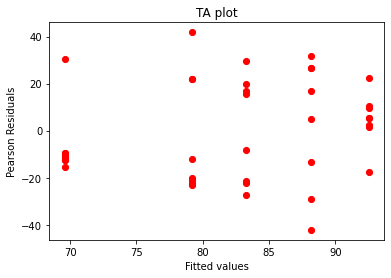

In [11]:
x=np.array(mdf.fittedvalues)
y=np.array(mdf.resid)
#fig, ax = plt.subplots()
plt.scatter(x, y,s = 150, c = 'red', marker = '.')
plt.title('TA plot')
plt.ylabel('Pearson Residuals')
plt.xlabel('Fitted values')
plt.show()

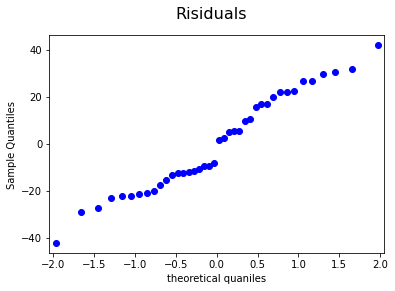

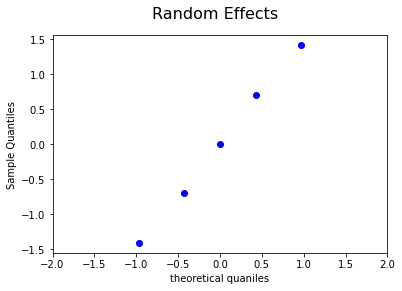

In [12]:
Y_hat=np.random.normal(0,1,40)
Y_hat2=np.random.normal(0,1,5)
pp_x2=sm.ProbPlot(np.array([1,2,3,4,5]), fit=True)
pp_y2=sm.ProbPlot(Y_hat2, fit=True)
pp_x = sm.ProbPlot(y, fit=True)
pp_y = sm.ProbPlot(Y_hat, fit=True)
fig1= pp_x.qqplot(pp_y)
fig1.suptitle('Risiduals', fontsize=16)
fig1=plt.xlabel('theoretical quaniles')
fig2=pp_x2.qqplot(pp_y2)
fig2.suptitle('Random Effects', fontsize=16)
fig2=plt.xlabel('theoretical quaniles')
plt.xlim(-2, 2)
plt.show()

### 1.1.2 More Than One Factor